# Questions

1) What was the change in price of the stock over time?
2) What was the daily return of the stock on average?
3) What was the moving average of the various stocks?
4) What was the correlation between the different stocks' closing prices?
5) How much value do we put at risk by investing in a particular stock?
6) How can we attempt to predict future stock behavior?


In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import scipy.stats as stats

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader import DataReader
import yfinance as yf

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [7]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-25,138.429993,141.789993,138.339996,140.520004,139.685913,92482700
2022-05-26,137.389999,144.339996,137.139999,143.779999,142.926544,90601500
2022-05-27,145.389999,149.679993,145.259995,149.639999,148.751770,90978500
2022-05-31,149.070007,150.660004,146.839996,148.839996,147.956528,103718400
2022-06-01,149.899994,151.740005,147.679993,148.710007,147.827301,74286600
...,...,...,...,...,...,...
2023-05-18,173.000000,175.240005,172.580002,175.050003,175.050003,65496700
2023-05-19,176.389999,176.389999,174.940002,175.160004,175.160004,55772400
2023-05-22,173.979996,174.710007,173.449997,174.199997,174.199997,43570900


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-05-25 to 2023-05-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<Axes: xlabel='Date'>

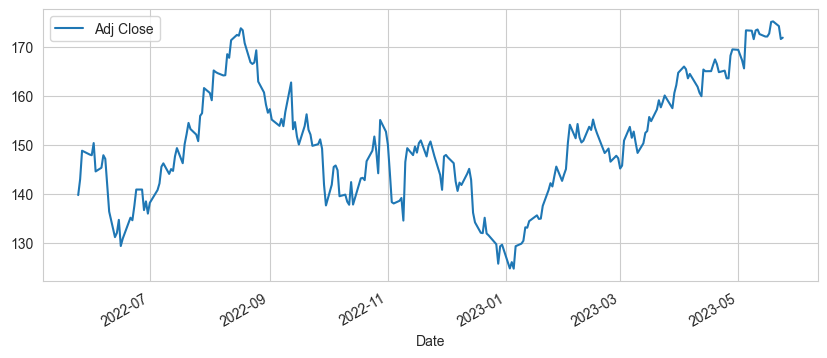

In [11]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

<Axes: xlabel='Date'>

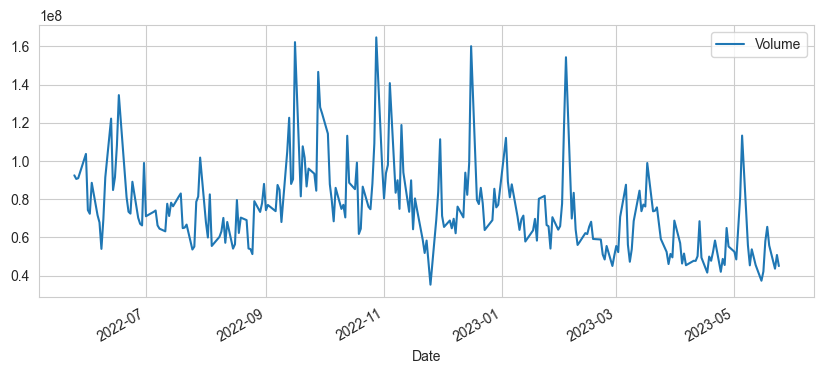

In [12]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [13]:
ma_day = [5,10,20,50]

In [14]:
for ma in ma_day:
    column_name = "MA for %s days" %str(ma)
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

<Axes: xlabel='Date'>

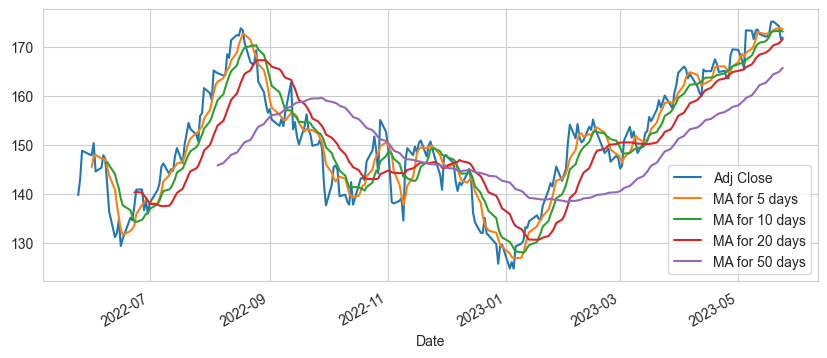

In [15]:
AAPL[['Adj Close', 'MA for 5 days','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, legend = True, figsize=(10,4))

<Axes: xlabel='Date'>

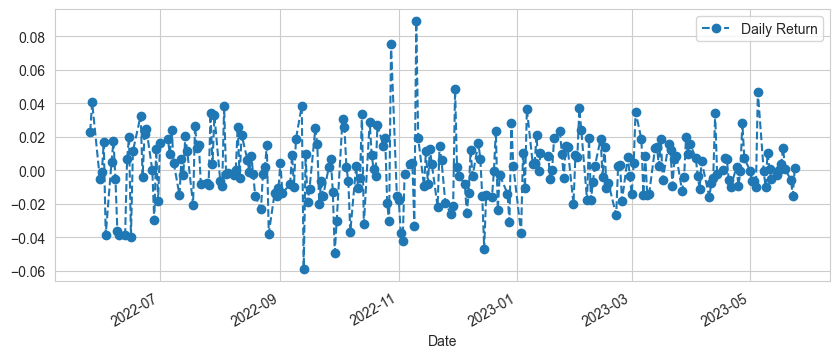

In [16]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

/var/folders/qq/26ffq_px3j955nw851qqn_t00000gp/T/ipykernel_46293/3966669376.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')


<Axes: xlabel='Daily Return', ylabel='Density'>

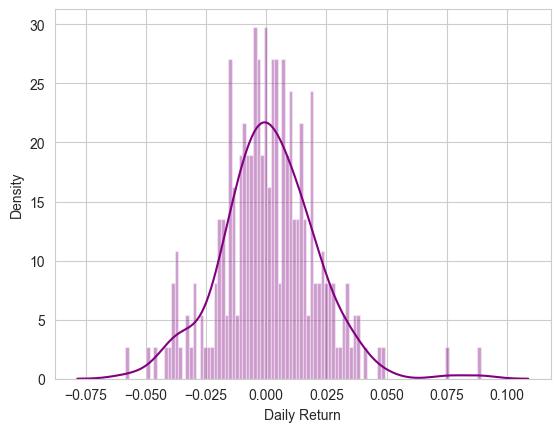

In [17]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

<Axes: >

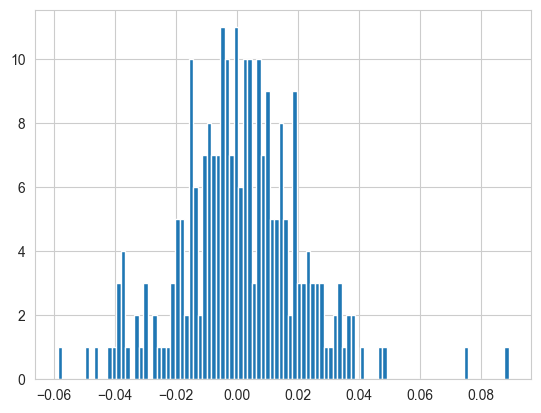

In [18]:
AAPL['Daily Return'].hist(bins=100)

In [19]:
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [20]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-05-25,139.685913,106.775002,105.839500,260.006714
2022-05-26,142.926559,111.077499,108.295998,263.354340
2022-05-27,148.751770,115.146500,112.799004,270.624084
2022-05-31,147.956512,120.209503,114.039001,269.267212
2022-06-01,147.827301,121.683998,114.137001,269.811920


In [21]:
tech_rest = closing_df.pct_change()

In [22]:
tech_rest.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-05-25,NaN,NaN,NaN,NaN
2022-05-26,0.023200,0.040295,0.023210,0.012875
2022-05-27,0.040757,0.036632,0.041581,0.027604
2022-05-31,-0.005346,0.043970,0.010993,-0.005014
2022-06-01,-0.000873,0.012266,0.000859,0.002023


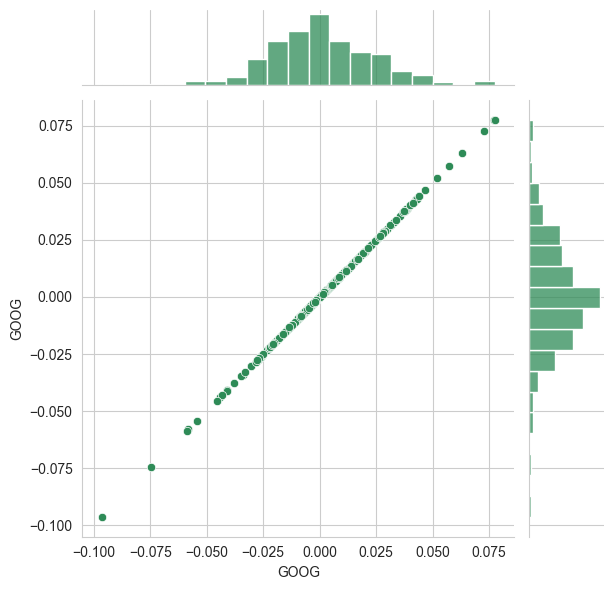

In [23]:
sns.jointplot(x='GOOG',y='GOOG', data=tech_rest, kind='scatter', color='seagreen')

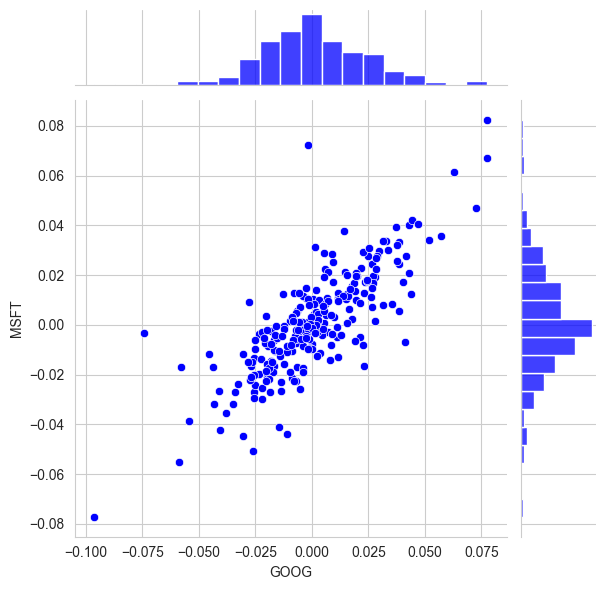

In [24]:
sns.jointplot(x='GOOG',y='MSFT', data=tech_rest, kind='scatter', color='blue')

In [25]:
corr_coef,_ = stats.pearsonr(tech_rest['GOOG'].dropna(), tech_rest['MSFT'].dropna())
corr_coef

0.7984044082210748

In [26]:
tech_rest.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-05-25,NaN,NaN,NaN,NaN
2022-05-26,0.023200,0.040295,0.023210,0.012875
2022-05-27,0.040757,0.036632,0.041581,0.027604
2022-05-31,-0.005346,0.043970,0.010993,-0.005014
2022-06-01,-0.000873,0.012266,0.000859,0.002023


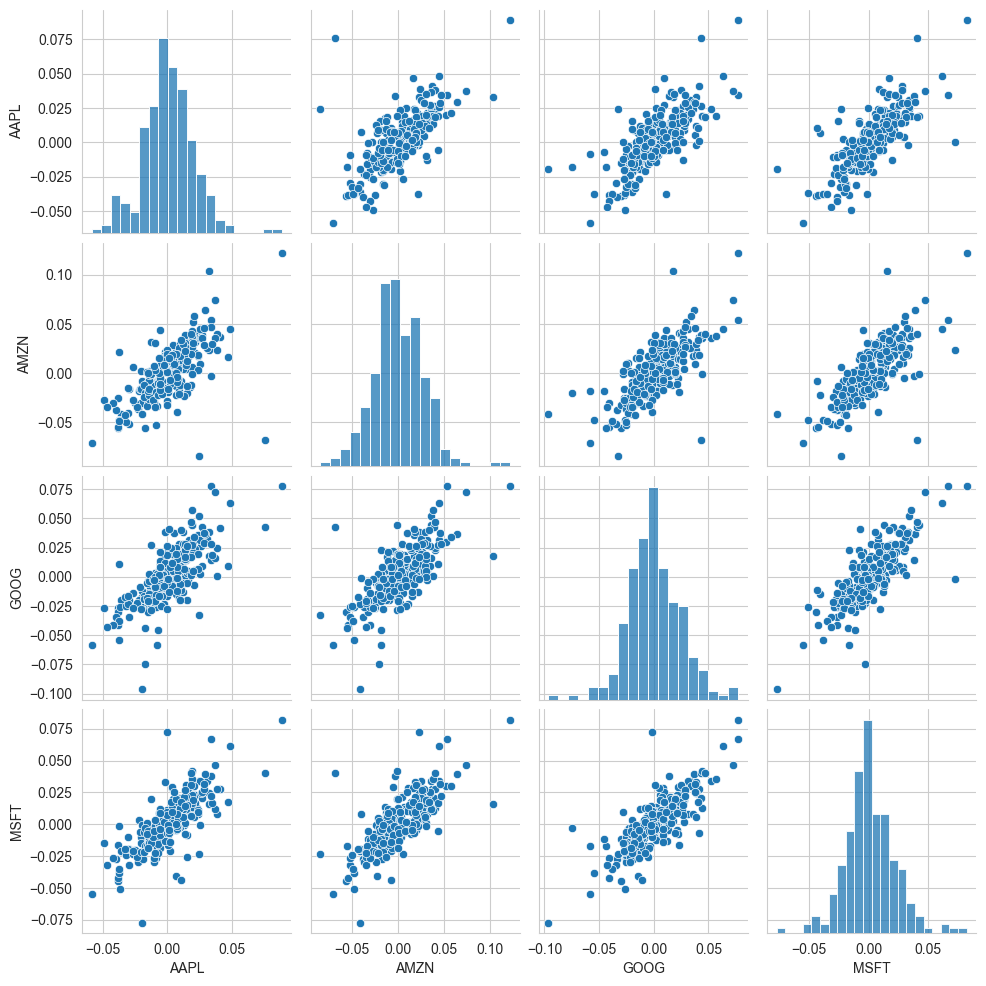

In [27]:
sns.pairplot(tech_rest.dropna())

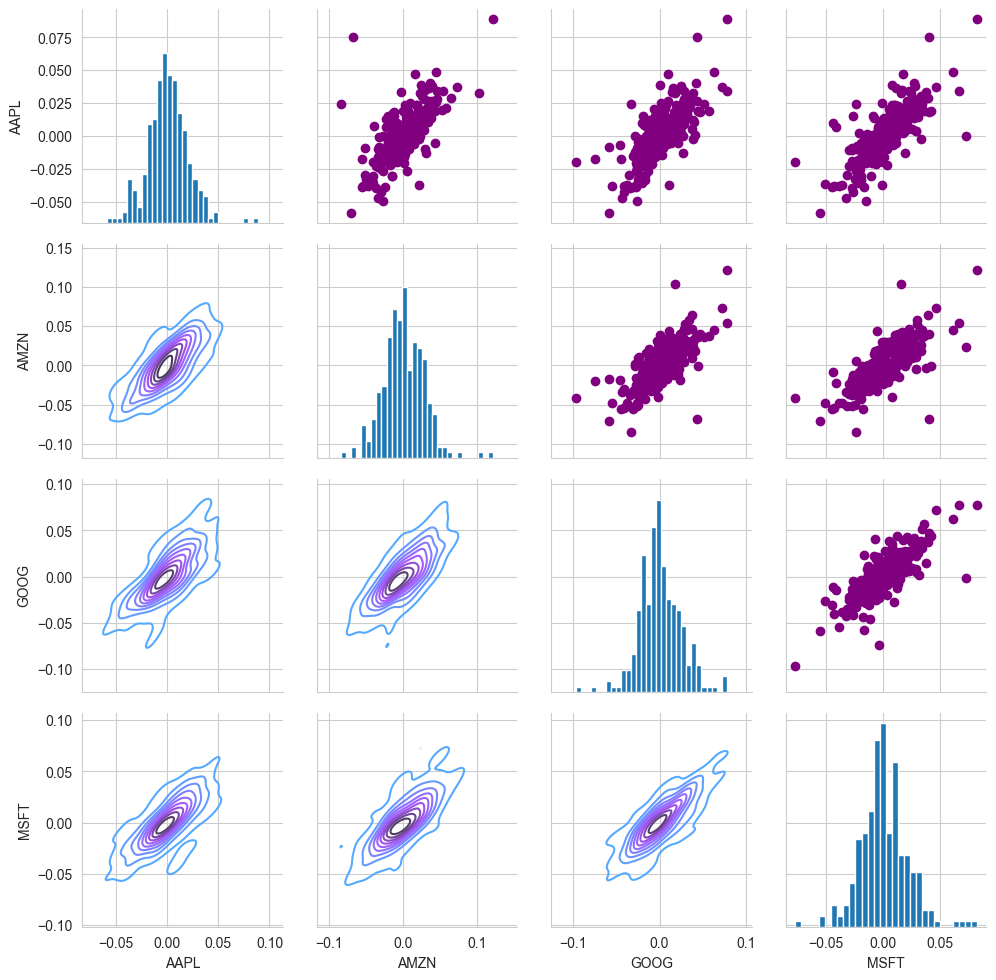

In [28]:
returns_fig = sns.PairGrid(tech_rest.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

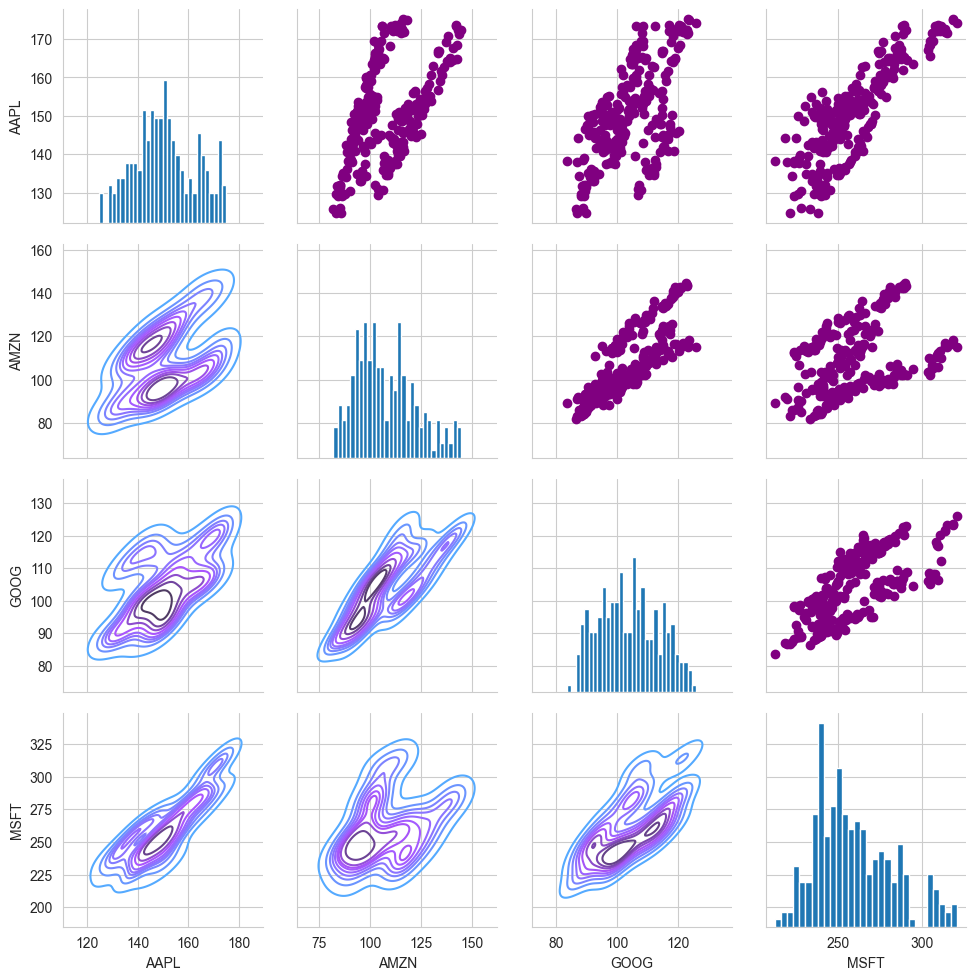

In [29]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation Heatmap')

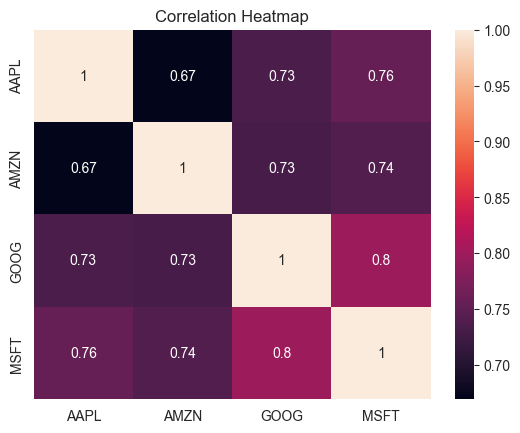

In [30]:
# Compute the correlation matrix
corr_matrix = tech_rest.dropna().corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True)

# Set the title
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Correlation Heatmap')

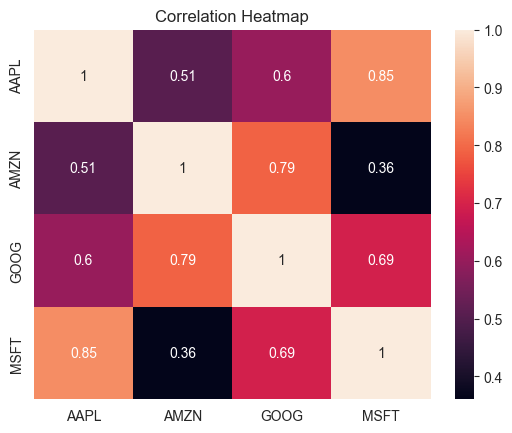

In [31]:
# Compute the correlation matrix
corr_matrix = closing_df.dropna().corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True)

# Set the title
plt.title('Correlation Heatmap')

In [32]:
rets = tech_rest.dropna()

Text(0, 0.5, 'Risk')

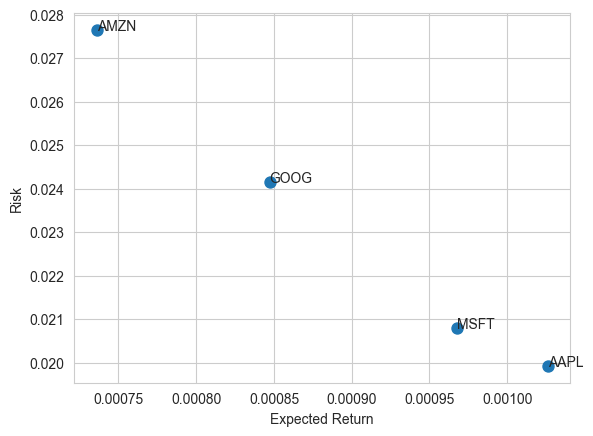

In [36]:
area = np.pi*20

plt.scatter(x=rets.mean(), y=rets.std(), s=area)

for i, col_name in enumerate(rets.columns):
    plt.text(rets.mean()[i], rets.std()[i], col_name)


plt.xlabel('Expected Return')
plt.ylabel('Risk')

/var/folders/qq/26ffq_px3j955nw851qqn_t00000gp/T/ipykernel_46293/3966669376.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')


<Axes: xlabel='Daily Return', ylabel='Density'>

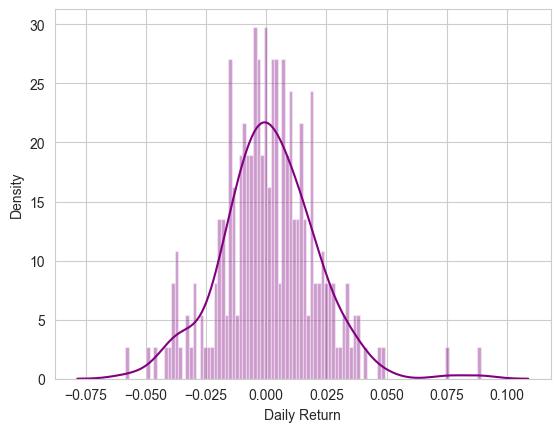

In [38]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [39]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-05-26,0.023200,0.040295,0.023210,0.012875
2022-05-27,0.040757,0.036632,0.041581,0.027604
2022-05-31,-0.005346,0.043970,0.010993,-0.005014
2022-06-01,-0.000873,0.012266,0.000859,0.002023
2022-06-02,0.016811,0.031450,0.031620,0.007929


In [40]:
rets['AAPL'].quantile(0.05)

-0.034711229781552694

In [41]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [42]:
def stock_monte_carlo(start_price, days, my, sigma):
    
    price = np.zeros(days)
    
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [43]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-25,105.141998,106.544701,104.211250,105.839500,105.839500,37900000
2022-05-26,106.050499,108.955254,105.487999,108.295998,108.295998,30288000
2022-05-27,109.788498,112.867996,109.550003,112.799004,112.799004,29924000
2022-05-31,113.079002,116.433502,112.572502,114.039001,114.039001,51302000
2022-06-01,114.931503,117.399002,113.550499,114.137001,114.137001,28630000


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

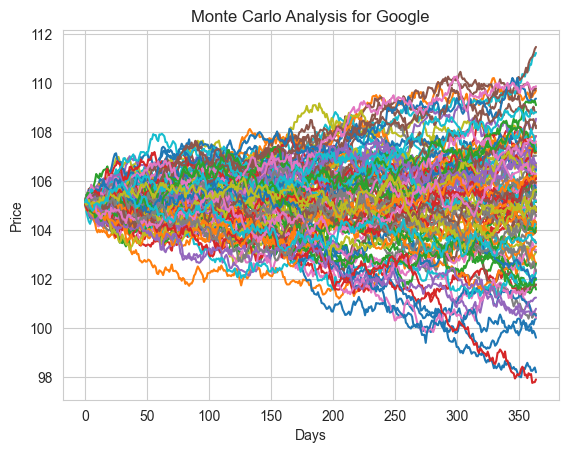

In [44]:
start_price = 105.14

for run in range(100):
    
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [45]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
    

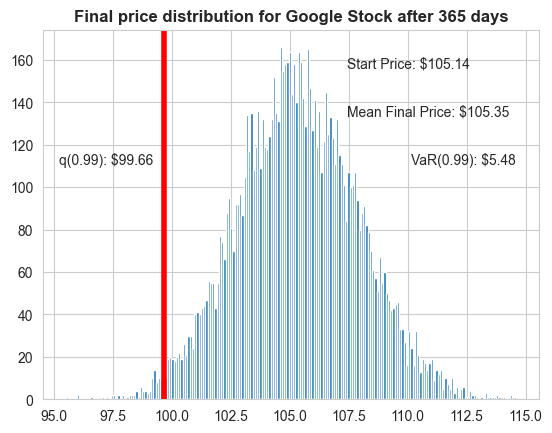

In [48]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins = 200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start Price: $%0.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, s="Mean Final Price: $%0.2f" %simulations.mean())

# Variance of the price (with 99% confidence interval)
plt.figtext(0.7, 0.6, s="VaR(0.99): $%0.2f" %(start_price-q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%0.2f" %q)

# Plot a line at the 1% quantile
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold');